<a href="https://colab.research.google.com/github/Starboy177/DataScience/blob/main/JasoHasiU7proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU7proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU7proj.ipynb"

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!

**Task**:

Two parts:

1. Propose a data set that's compatible with pymc and/or bambi. I must approve your submission before you move on to part 2.

2. Create, analyze, and present any guassian process or approximate GP, degenerate or otherwise (this means glms and b splines are allowed), using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is), or if must be an actual GP
  - You must document and explain your model selection method. This means you must argue that your model choice (glm, b spline, GP) is better than at least one other choice. You may use either a theoretical or numerical argument.



I'm a huge soccer fan, so I decided for this project that I would use a data set for soccer player's stats. I am going to try to see if a players number of through balls, chances created, crosses, appearances, and wins contribute to a higher amount of assists.

In [78]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-ll2ai7p0
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-ll2ai7p0
  Resolved https://github.com/pydata/xarray.git to commit 852ad1135b9b8c46d8e301c9badbe898bd6d262d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [102]:
soccer = pd.read_csv('https://raw.githubusercontent.com/Starboy177/DataScience/refs/heads/main/dataset%20-%202020-09-24.csv')
soccer

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [103]:
soccer = soccer.query('Appearances>10 and Position != "GK"')
soccer

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,João Moutinho,28.0,Wolverhampton-Wanderers,Midfielder,Portugal,34.0,78,32,23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,11,0,95,3.0
563,Leander Dendoncker,32.0,Wolverhampton-Wanderers,Midfielder,Belgium,25.0,59,26,15,6,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,43,1.0
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0


In [104]:
soccer = soccer[['Assists','Big chances created','Through balls','Appearances','Wins','Crosses']]
soccer

,Assists,Big chances created,Through balls,Appearances,Wins,Crosses
0,0,NaN,NaN,64,28,NaN
3,18,28.0,31.0,160,90,389.0
4,1,1.0,0.0,16,7,45.0
6,2,4.0,2.0,44,21,1.0
7,0,0.0,1.0,41,25,3.0
...,...,...,...,...,...,...
562,14,16.0,10.0,78,32,422.0
563,0,2.0,0.0,59,26,16.0
566,4,5.0,NaN,31,14,52.0
567,13,26.0,NaN,78,32,57.0


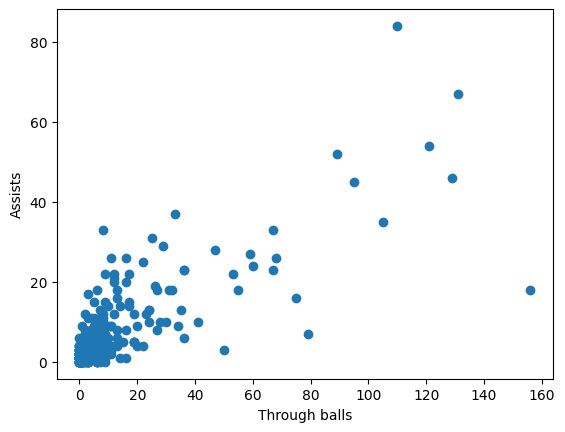

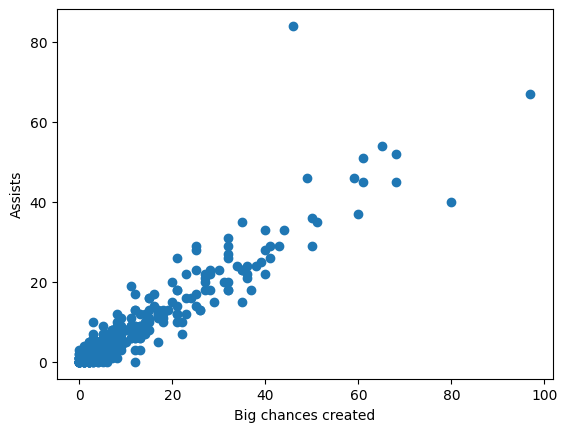

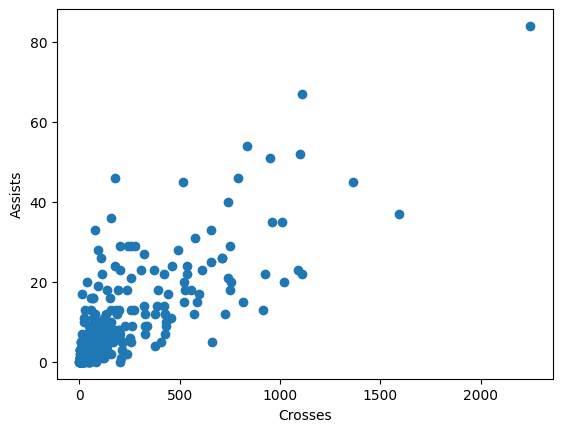

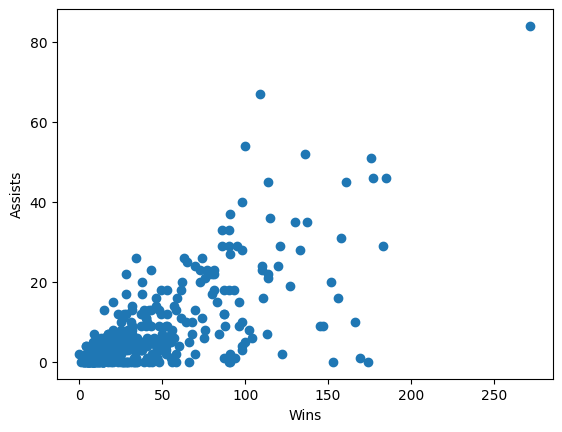

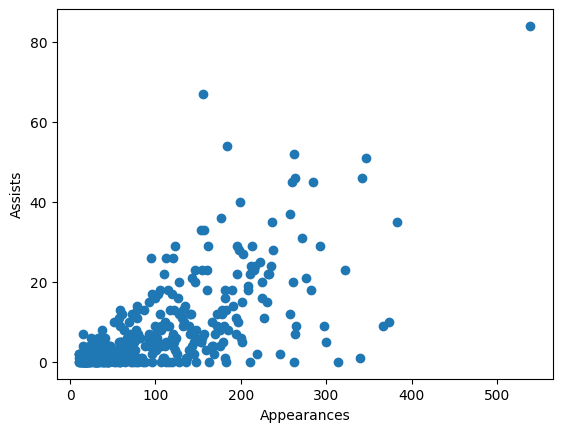

In [105]:
x = ["Through balls", "Big chances created", "Crosses","Wins","Appearances"]
y = "Assists"
for a in x:
  plt.scatter(soccer[a], soccer[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

Big chances created clearly has the best relationship with Assists, but Crosses and through balls also look to be pretty good, so I'm going to try a model with all three of those and one without through balls since I think crosses looks a little better.

In [106]:
for column in soccer.columns:
  if soccer[column].isnull().any():  # Check for missing values in the column
    soccer[column] = soccer[column].fillna(soccer[column].mean())  # Fill missing values with column mean

model = bmb.Model("Assists ~ 'Big chances created' + Crosses", soccer)
idata = model.fit(idata_kwargs={"log_likelihood":True})

<ipython-input-106-0b89c662307a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soccer[column] = soccer[column].fillna(soccer[column].mean())  # Fill missing values with column mean


Output()

In [107]:
for column in soccer.columns:
  if soccer[column].isnull().any():  # Check for missing values in the column
    soccer[column] = soccer[column].fillna(soccer[column].mean())  # Fill missing values with column mean

model_2 = bmb.Model("Assists ~ 'Big chances created' + Crosses + 'Through balls'", soccer)
idata_2 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                   rank     elpd_loo      p_loo  elpd_diff  weight         se  \
Chances + Crosses     0 -1158.379438  26.493856   0.000000     1.0  54.356091   
All 3                 1 -1159.839750  27.468572   1.460312     0.0  56.027290   

                        dse  warning scale  
Chances + Crosses  0.000000     True   log  
All 3              1.739091     True   log  


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


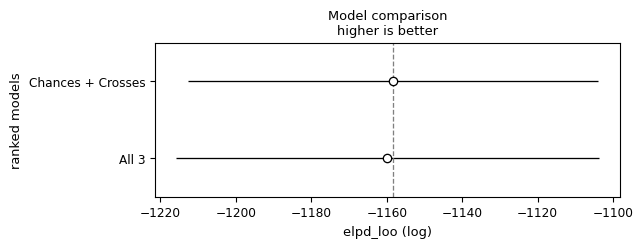

In [99]:
# Perform model comparison using ELPD-LOO
compare = az.compare({"Chances + Crosses": idata, "All 3": idata_2})

# Print and visualize comparison
print(compare)
az.plot_compare(compare)
plt.show()

As we can see, the elpd_loo is slightly better in the model without through balls, so I'll use that one.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='Big chances created', ylabel='Assists'>],
       dtype=object))

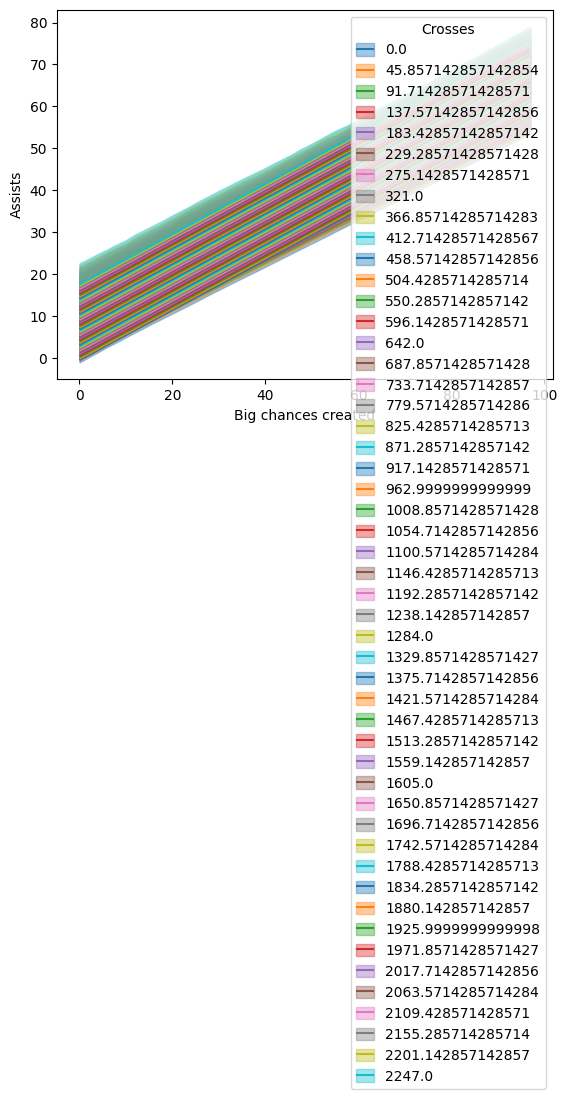

In [100]:
bmb.interpret.plot_predictions(model, idata, ["Big chances created", "Crosses"])

This pretty much shows exactly what I expected, which is that more chances created and crosses strongly postively correlate with more assists. I imagine the same would be true for through balls as well. Altough I think if I were to do this again, I might not use Big chances created, because it is a little too closely related to assists, so I think the results would be more interesting if I hadn't included that, but I'm happy with the results.